In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("house_price_prediction.csv")

In [3]:
df.head()

,House_ID,Location,Square_Feet,Number_of_Bedrooms,Number_of_Bathrooms,Number_of_Floors,Year_Built,Year_Renovated,Price
0,1,Mumbai,2500,3,2.0,2,2000,2015,350000
1,2,Delhi,3000,4,3.0,2,1995,0,420000
2,3,Bengaluru,1800,2,1.0,1,2010,0,250000
3,4,Chennai,3200,5,3.5,2,2005,2018,550000
4,5,Kolkata,2700,4,2.5,1,1990,0,380000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   House_ID             132 non-null    int64  
 1   Location             132 non-null    object 
 2   Square_Feet          132 non-null    int64  
 3   Number_of_Bedrooms   132 non-null    int64  
 4   Number_of_Bathrooms  132 non-null    float64
 5   Number_of_Floors     132 non-null    int64  
 6   Year_Built           132 non-null    int64  
 7   Year_Renovated       132 non-null    int64  
 8   Price                132 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 9.4+ KB


In [5]:
df.describe()

,House_ID,Square_Feet,Number_of_Bedrooms,Number_of_Bathrooms,Number_of_Floors,Year_Built,Year_Renovated,Price
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,66.500000,2654.545455,3.234848,2.219697,1.393939,2002.909091,152.825758,383939.393939
std,38.249183,711.236278,0.889805,0.893696,0.490483,9.385269,535.831201,119450.124222
min,1.000000,1500.000000,2.000000,1.000000,1.000000,1985.000000,0.000000,200000.000000
25%,33.750000,2100.000000,3.000000,2.000000,1.000000,1995.000000,0.000000,290000.000000
50%,66.500000,2600.000000,3.000000,2.000000,1.000000,2004.000000,0.000000,360000.000000
75%,99.250000,3100.000000,4.000000,3.000000,2.000000,2010.250000,0.000000,452500.000000
max,132.000000,4300.000000,5.000000,4.500000,2.000000,2020.000000,2020.000000,690000.000000


In [18]:
{column : (df[column].unique()) for column in df.columns if df.dtypes[column]=='object'}


{'Location': array(['Mumbai', 'Delhi', 'Bengaluru', 'Chennai', 'Kolkata', 'Hyderabad',
        'Pune', 'Jaipur', 'Lucknow', 'Ahmedabad', 'Chandigarh', 'Indore',
        'Coimbatore', 'Patna', 'Goa', 'Kochi', 'Ludhiana', 'Visakhapatnam',
        'Surat'], dtype=object)}

In [6]:
df.columns

Index(['House_ID', 'Location', 'Square_Feet', 'Number_of_Bedrooms',
       'Number_of_Bathrooms', 'Number_of_Floors', 'Year_Built',
       'Year_Renovated', 'Price'],
      dtype='object')

In [7]:
df.isnull().sum()

House_ID               0
Location               0
Square_Feet            0
Number_of_Bedrooms     0
Number_of_Bathrooms    0
Number_of_Floors       0
Year_Built             0
Year_Renovated         0
Price                  0
dtype: int64

In [9]:
x = df[['Square_Feet', 'Number_of_Bedrooms',
       'Number_of_Bathrooms', 'Number_of_Floors', 'Year_Built',
       'Year_Renovated']]
y = df['Price']

In [10]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x, y , test_size=0.6)


In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [19]:
print('Coeff:',lr.coef_)
print('y-intercet:',lr.intercept_)


Coeff: [ 1.34440125e+02  1.00618278e+04  1.48088308e+04 -5.52356873e+03
  1.63774346e+03  1.30159997e+01]
y-intercet: -3312506.4275404303


In [13]:
coeff_ = pd.DataFrame(lr.coef_, x.columns,columns = ['Coefficients'])
coeff_

,Coefficients
Square_Feet,134.440125
Number_of_Bedrooms,10061.827823
Number_of_Bathrooms,14808.830765
Number_of_Floors,-5523.568731
Year_Built,1637.743456
Year_Renovated,13.016000


In [14]:
pred = lr.predict(x_test)


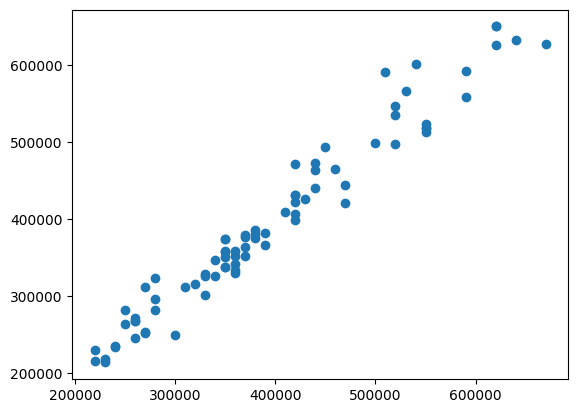

In [15]:
plt.scatter(y_test, pred)


In [16]:
from sklearn import metrics


In [17]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 18269.968779469094
MSE: 589588427.4201957
RMSE: 24281.442037494307


In [20]:
print('r2 score:', metrics.r2_score(y_test, pred))


r2 score: 0.9541691249679439


In [21]:
y_hat = lr.predict(x_test)
print("Residual Sum of squares  is :",np.mean((y_test-y_hat)**2))
metrics.r2_score(y_test,y_hat)

Residual Sum of squares  is : 589588427.4201957


0.9541691249679439

In [23]:
print('Variance score:', lr.score(x_test, y_test))


Variance score: 0.9541691249679439
